### Install dependencies:

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 2.91 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.


### Import dependencies:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2

import os
os.environ['PYTHONHTTPSVERIFY'] = '0' # Disable SSL to make it work on Mac

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # Load the model, 5s indicates v5, small model

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/rajin/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/rajin/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-6 Python-3.13.1 torch-2.6.0 CPU

100%|██████████| 14.1M/14.1M [00:05<00:00, 2.73MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


### Display info about the model:

In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Load images and make baseline detections:

In [18]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [19]:
results = model(img)
results.print()

/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 2654.5ms pre-process, 93.6ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


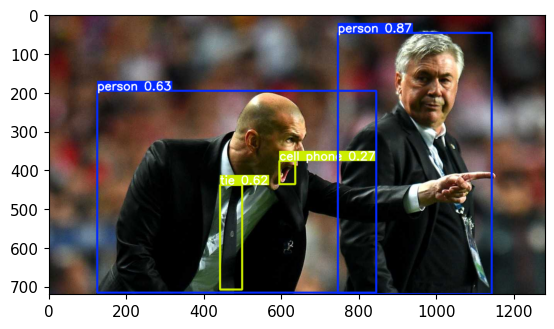

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

In [21]:
img2 = 'https://media.istockphoto.com/id/159406920/photo/aerial-view-of-cars-in-traffic.jpg?s=612x612&w=0&k=20&c=2BeXnk1EppE_mfWgYFqoXidmge0uAhSk9gl8bbtHyF8%3D'
results2 = model(img2)
results2.print()

/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 408x612 27 cars, 1 traffic light
Speed: 133.9ms pre-process, 96.2ms inference, 0.8ms NMS per image at shape (1, 3, 448, 640)


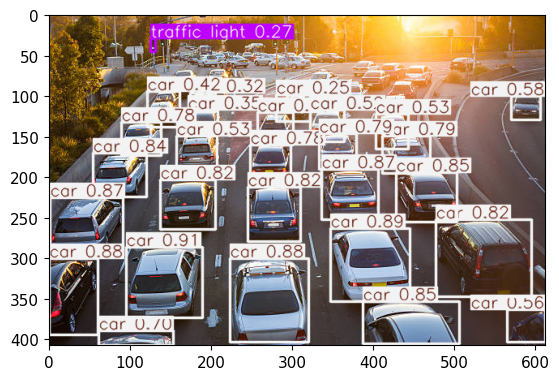

In [22]:
%matplotlib inline
plt.imshow(np.squeeze(results2.render()))

### Real time detection: